# Homework #2
### Hakkel Tamás - 2018.10.11.

In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 7
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

## 1a. Simulation of tossing

In [2]:
class coinFlipper():
    def __init__(self, swindler = False):
        self.probOfHead = random.normalvariate(1/2,0.1) if swindler else 1/2
        self.history = []
        self.relFreqOfHead_history = []
        
    def runSimulation(self,steps = 5000):
        for i in range(steps):
            self.flip()
        print("Simulation is done with {} iterations".format(steps))
        
    def flip(self):
        newValue = 'head' if random.uniform(0,1) < self.probOfHead else 'tail'
        self.history.append(newValue)
        self.relFreqOfHead_history.append(self.relFreqOfHead())
        return newValue
    
    def relFreqOfHead(self):
        return self.history.count('head') / len(self.history)

In [3]:
CF = coinFlipper(True)
print("Hidden probability of head: {:5.3f}".format(CF.probOfHead))
CF.runSimulation()

Hidden probability of head: 0.488
Simulation is done with 5000 iterations


## 1b. Visualization of number of different outcomes

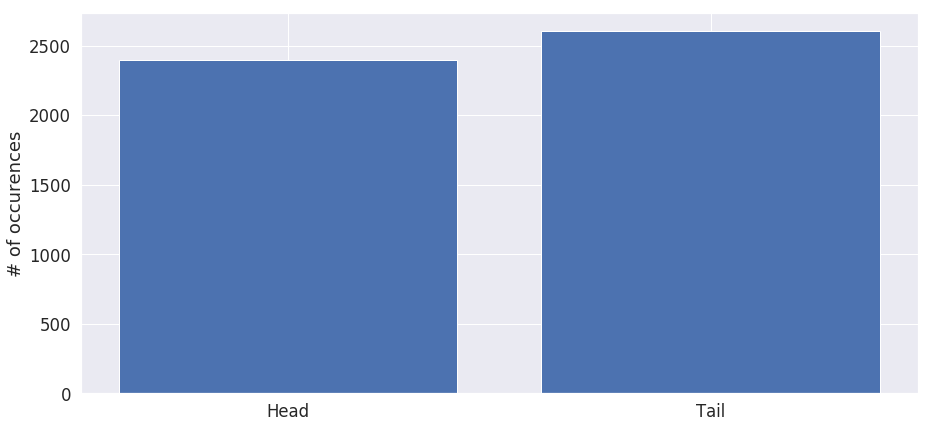

In [4]:
fig, ax = plt.subplots()
plt.bar([1, 2], [CF.history.count('head'), CF.history.count('tail')])
ax.set_xticks([1, 2])
ax.set_xticklabels(['Head', 'Tail'])
plt.ylabel('# of occurences')
plt.show()

## 2. Estimation of probability of heads
Based on the law of large numbers (i.e. the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed), we can use relative frequency of heads to estimate the hidden probability of heads because expected value of the process is equal to the hidden probability of heads (if we consider heads as $0$ and tails as $1$).

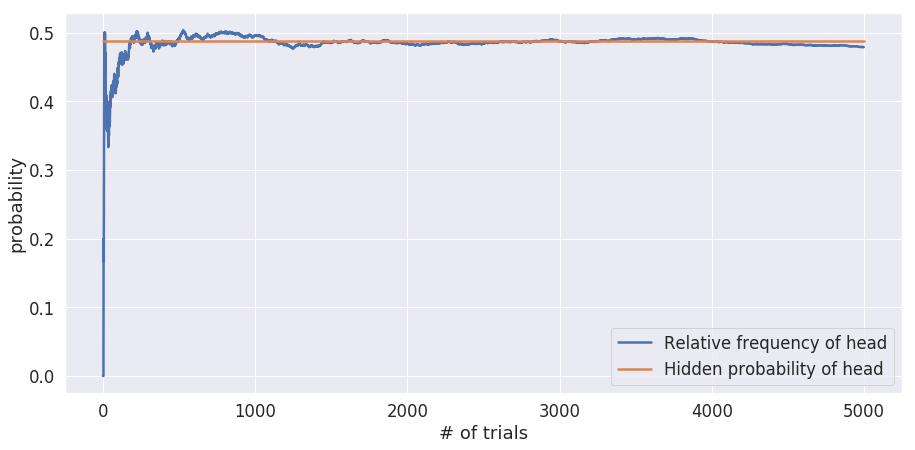

In [5]:
plt.plot(CF.relFreqOfHead_history)
plt.plot([0, len(CF.history)], [CF.probOfHead, CF.probOfHead])
plt.legend(['Relative frequency of head', 'Hidden probability of head'])
plt.xlabel('# of trials')
plt.ylabel('probability')
plt.show()

## 3. Prehistory
Prehistory of that process is the choice of coin, that is what is the hidden probability of heads. That choice is done before simulation has started, and has effect on all coin tossings (i.e. it is in the intersection of all $H_{-m}^y$ subspaces, so it is in $H_\infty^y$).

## 4. What can you say about the outcome as a stochastic process?
Coin tossing **can be transformed to w.s.st. process** by shifting its expected value to $0$ (i.e. substracting hidden probability of heads), and other requirements for w.s.st. is already satisfied:
 - $E(y_n^2) \lt \infty$ as all $y_n$ values are bounded (either zero or one), and 
 - $r(\tau) = cov(y_{n-\tau} y_n) = \delta_{\tau=0}$, so it is obviously independent from n.
 
That process is **not completely regular** because $H_\infty^y \ne \{0\}$, but also **not singular** because outcomes are independent of previous values (it is an orthogonal process &rarr; $E(y_n y_m) = 0 : n \ne m$).

## 5. New game: dice throwing
Swindler changes probability of throwing 6 by some extent.

In [6]:
class diceThrowing():
    def __init__(self, swindler = False):
        self.probOfSix = random.normalvariate(1/6,0.1) if swindler else 1/6
        self.probOfOthers = (1 - self.probOfSix) / 5
        self.history = []
        self.relFreqOfHead_history = []
        
    def runSimulation(self,steps = 10000):
        for i in range(steps):
            self.throw()
        print("Simulation is done with {} iterations".format(steps))
        
    def throw(self):
        newValue = random.uniform(0,1) // self.probOfOthers + 1
        self.history.append(newValue)
        return newValue

In [7]:
DT = diceThrowing(True)
print("Hidden probability of six: {:5.3f}".format(DT.probOfSix))
DT.runSimulation()

Hidden probability of six: 0.089
Simulation is done with 10000 iterations


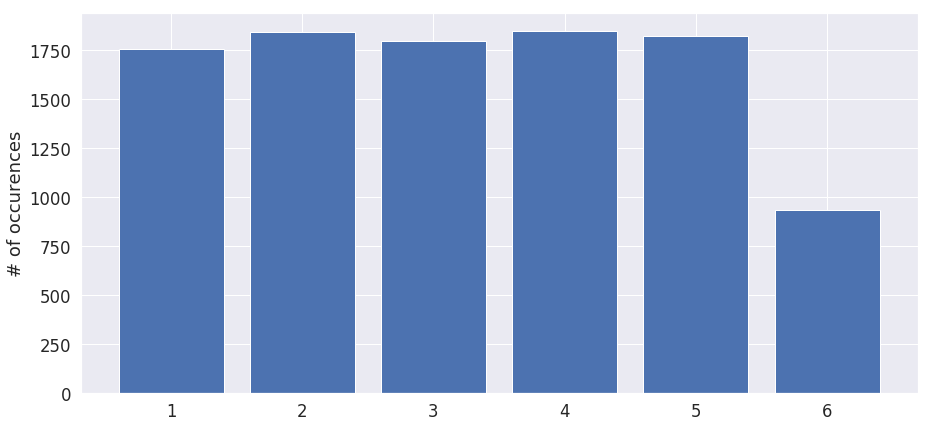

In [8]:
fig, ax = plt.subplots()
plt.bar(range(1,7), [DT.history.count(i) for i in range(1,7)])
plt.ylabel('# of occurences')
plt.show()